In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [11]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',
    image_size = (150,150),
    batch_size = 32,
    validation_split=0.2,  # Veri setinin %20'si doğrulama için ayrılır
    subset='training',  # Eğitim verisi olarak işaretlenmesi
    seed=123  # Veri karıştırmayı tekrarlanabilir hale getirmek için
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'dataset/test',
    image_size = (150,150),
    batch_size = 32,
    validation_split=0.2,  # Veri setinin %20'si doğrulama için ayrılır
    subset='validation',  # Eğitim verisi olarak işaretlenmesi
    seed=123  # Veri karıştırmayı tekrarlanabilir hale getirmek için
)
class_names = train_dataset.class_names
print("Sınıflar:", class_names)

Found 40 files belonging to 4 classes.
Using 32 files for training.
Found 40 files belonging to 4 classes.
Using 8 files for validation.
Sınıflar: ['armut', 'elma', 'portakal', 'trabzon_hurma']


In [12]:
normalization_layer = layers.Rescaling(1./255) # Pixel değerini 0-1 aralığına alıp daha hızlı öğrenmesini sağlamak için kullanacağız
train_dataset = train_dataset.map(lambda x,y: (normalization_layer(x),y))
validation_dataset = validation_dataset.map(lambda x,y: (normalization_layer(x),y))


In [14]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation= 'relu', input_shape = (150, 150, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3, 3), activation= 'relu', input_shape = (150, 150, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3, 3), activation= 'relu', input_shape = (150, 150, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(len(class_names), activation= 'softmax')

])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,868 (18.42 MB)

 Trainable params: 4,828,868 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 2
)

Epoch 1/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.2812 - loss: 1.3851 - val_accuracy: 0.3750 - val_loss: 1.2578
Epoch 2/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 1.1420 - val_accuracy: 0.6250 - val_loss: 1.6534


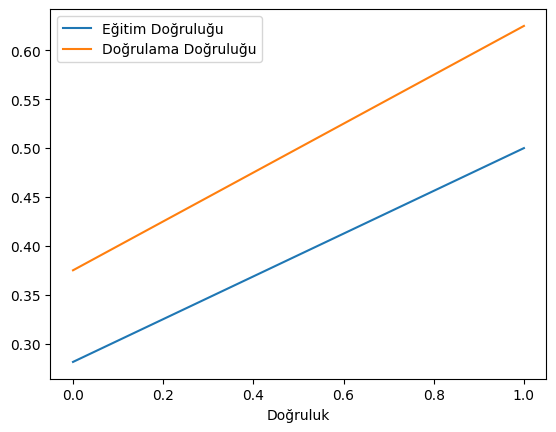

In [17]:
plt.plot(history.history['accuracy'], label = 'Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label = 'Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.xlabel('Doğruluk')
plt.legend()
plt.show()




In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Örnek bir resimle tahmin yapma
img_path = 'dataset/test/elma/elma.png'  # Tahmin yapılacak resim
img = tf.keras.utils.load_img(img_path, target_size=(150, 150))  # Resmi yükle ve boyutlandır
img_array = tf.keras.utils.img_to_array(img) / 255.0  # Normalize et
img_array = tf.expand_dims(img_array, axis=0)  # Batç boyutunu ekle

predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]
print(f"Bu resim: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Bu resim: elma


In [64]:
import numpy as np
import tensorflow as tf
from google.colab import files
import io
from PIL import Image

def analyze_uploaded_image(model, class_names, similarity_threshold=0.7):  # Eşik değerini yükselttim
    """
    Colab üzerinden yüklenen resmi analiz eder
    """
    print("Lütfen bir resim dosyası yükleyin...")
    uploaded = files.upload()

    for filename in uploaded.keys():
        try:
            # Yüklenen resmi oku
            image_bytes = uploaded[filename]
            img = Image.open(io.BytesIO(image_bytes))

            # Resmi RGB formatına dönüştür
            img = img.convert('RGB')

            # Resmi modelin istediği formata dönüştür
            img = img.resize((150, 150))
            img_array = tf.keras.utils.img_to_array(img) / 255.0
            img_array = tf.expand_dims(img_array, axis=0)

            # Tahminleri al
            predictions = model.predict(img_array, verbose=0)

            # Sonuçları sırala
            class_probabilities = [(class_names[i], float(prob) * 100)
                                 for i, prob in enumerate(predictions[0])]
            sorted_predictions = sorted(class_probabilities,
                                     key=lambda x: x[1],
                                     reverse=True)

            # En yüksek benzerlik
            best_match = sorted_predictions[0]

            # Güven skorunu kontrol et
            if best_match[1] < similarity_threshold * 100:
                print("\n⚠️ Uyarı: Düşük güven skoru!")
                print("Bu resim hiçbir sınıfa yüksek güvenle ait değil.")
                print("\nDüşük güvenli tahminler:")
                for class_name, probability in sorted_predictions:
                    print(f"{class_name}: {probability:.2f}%")
                return None

            print(f"\nYüklenen resim: {filename}")
            print("\nBenzerlik Analizi Sonuçları:")
            print("-" * 30)

            # En yüksek iki tahmini karşılaştır
            if len(sorted_predictions) > 1:
                diff = sorted_predictions[0][1] - sorted_predictions[1][1]
                if diff < 20:  # İlk iki tahmin arasında %20'den az fark varsa
                    print("❗ Belirsiz Tahmin!")
                    print(f"İlk iki tahmin arasındaki fark çok az ({diff:.2f}%)")

            print(f"En çok benzeyen meyve: {best_match[0]} ({best_match[1]:.2f}%)")
            print("\nTüm benzerlik oranları:")
            for class_name, probability in sorted_predictions:
                print(f"{class_name}: {probability:.2f}%")

            return sorted_predictions

        except Exception as e:
            print(f"Hata oluştu: {str(e)}")
            return None

# Test etmek için:
predictions = analyze_uploaded_image(model, class_names)

Lütfen bir resim dosyası yükleyin...


Saving elma (10).png to elma (10).png

⚠️ Uyarı: Düşük güven skoru!
Bu resim hiçbir sınıfa yüksek güvenle ait değil.

Düşük güvenli tahminler:
elma: 56.04%
trabzon_hurma: 22.90%
armut: 16.43%
portakal: 4.64%


In [52]:
# model kaydetme

model.save ('meyve_siniflandirma_modeli.h5')

# model yükleme

model = tf.keras.models.load_model('meyve_siniflandirma_modeli.h5')